# Metric and Classification Evaluation

## Confusion Matrix

A confusion matrix can aid in understanding how a classifier performs. 

A binary classifier can have four classification results: true positves (TP), true negatives (TN), false positives (FP), and false negatives (FN). The first two are corect classifications. 

For example, assuming that positive means pregnant and negative is not pregnant, a false positve is like claiming a man is pregnant. A false negative is claiming that a pregnant woman is not. 

These two types od errors are referred as _type 1_ and _type 2_ error. 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
y_train = pd.read_excel('y_train.xls')
y_test = pd.read_excel('y_test.xls')
y = pd.read_excel('y.xls')
X = pd.read_excel('X.xls')
X_train = pd.read_excel('X_train.xls')
X_test = pd.read_excel('X_test.xls')

In [3]:
data = [y_test, y_train, y, X, X_test, X_train]
for d in data:
    d.drop(columns = 'Unnamed: 0', inplace = True)

In [48]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, max_depth=3)
dt.fit(X_train, y_train)
DecisionTreeClassifier(class_weight=None, criterion = 'gini', max_depth=None, max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=42, 
                      splitter = 'best', target_type_ = 'BINARY')
dt.score(X_test, y_test)

TypeError: __init__() got an unexpected keyword argument 'target_type_'

Pandas code to calculate classification results

In [5]:
y_predict = dt.predict(X_test)

In [6]:
tp = ((y_test.survived == 0) & (y_test.survived ==  y_predict)).sum()
tp

199

In [7]:
tn = ((y_test.survived == 0) & (y_test.survived ==  y_predict)).sum()
tn

199

In [8]:
fp = ((y_test.survived == 0 ) & (y_test.survived != y_predict)).sum()
fp

25

In [9]:
fn = ((y_test.survived == 1) & (y_test.survived != y_predict)).sum()
fn

49

In [10]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test.survived, y_predict)

In [11]:
def create_confusion_matrix_df(conf_mat):
    conf_df = pd.DataFrame({})
    for i in range(len(conf_mat)):
        cl = conf_mat[i]
        cl = cl.tolist()
        conf_df[i] = cl
        
       
    conf_df.rename(columns = {0:'Predicted died', 1:'Predicte surive'}, inplace = True)
    conf_df.rename({0:'True death', 1:'True survive'}, axis='index', inplace = True)
    return conf_df

In [12]:
create_confusion_matrix_df(conf_mat)

,Predicted died,Predicte surive
True death,199,49
True survive,25,120


C:\Users\alber\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


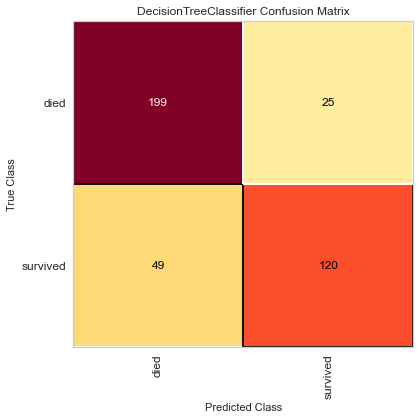

<AxesSubplot:title={'center':'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [37]:
from yellowbrick.classifier import ConfusionMatrix

mapping = {0:'died', 1:'survived'}
fig,ax = plt.subplots(figsize = (6,6))
cm_viz = ConfusionMatrix(dt,
                        classes = ['died', 'survived'],
                        label_encoder = 'mapping')
cm_viz.score(X_test, y_test)
cm_viz.poof()

## Metric

The `sklearn.metrics` module implements many common classification metrics, including:

* `accuracy` Percent of correct predictions
* `average_precision` Precision recall curve summary
* `f1` Harmonic mean of precision and recall
* `neg_log_loss` Logistic or cross-entropy loos (mdel must support `predic_proba`)
* `precision` Ability to find only relevant samples (not label a negative as a positive)
* `recall` Ability to find all positive samples
* `roc_auc` Area under the receiver operator characteristic curve

These strings can be used as the `scoring` parameter when doing grid searhc, or you can use functions from the `sklearn.metric` module that have the same names as the strings but end in `_score`.


__NOTE__ `f1`, `precision` and `recall` all support the following suffixes for multiclass classifiers:

* `_micro` Global weighted average of metric
* `_macro` Unweighted average of metric
* `_weighted` Multiclass weighted average of metric
* `_samples` Per sample metric

### Accuracy 

In [15]:
# Accuracy is the percentage of correct classifications: 

(tp+tn)/(tp+tn+fp+fn)

0.8432203389830508

In [19]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.811704834605598

### Recall

Recall, also called sensitivity, is the percentage of positive values correctly classified. _How many relevant rresults are returned?_ 

In [25]:
tp / (tp+fn)

0.8024193548387096

In [26]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.7100591715976331

### Precision 

Precision is the percentage of positive predictions that were corrected. _How relevant are the results?_

In [27]:
tp/(tp+fp)

0.8883928571428571

In [30]:
from sklearn.metrics import precision_score

precision_score(y_test, y_predict)

0.8275862068965517

### F1 

F1 is the harmonic mean of recall and precision

In [32]:
pre = tp/(tp+fp)
rec = tp/(tp+fn)

(2*pre*rec)/(pre+rec)

0.8432203389830508

In [33]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.7643312101910827

## Classification Report

Yellowbrick has a classification report showing precision,recall, and f1 scores for both positive and negative values. 

C:\Users\alber\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


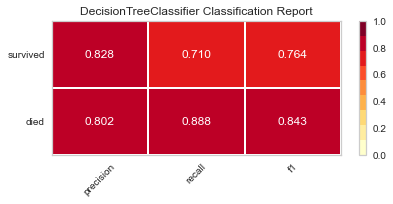

<AxesSubplot:title={'center':'DecisionTreeClassifier Classification Report'}>

In [39]:
from yellowbrick.classifier import ClassificationReport

fig, ax = plt.subplots(figsize = (6,3))
cm_viz = ClassificationReport(dt,classes = ['died', 'survived'], label_encoder = mapping)
cm_viz.score(X_test, y_test)
cm_viz.poof()

## ROC

A ROC curve illustrates how the classifier performs by tracking the true positive rate (recall/sensitivity) as the false positive rate (inverted specificity) changes. 

A rule of thumb is that the plot should bulge out toward the top-left corner. 
A plot that is to the left and above another plot indicates better performance. The diagonal in this plot indicates the behaviour of a random guessing classifier.  By taking the AUC, you get a metric for evaluating the performance

In [41]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_predict)

0.7992260143702452

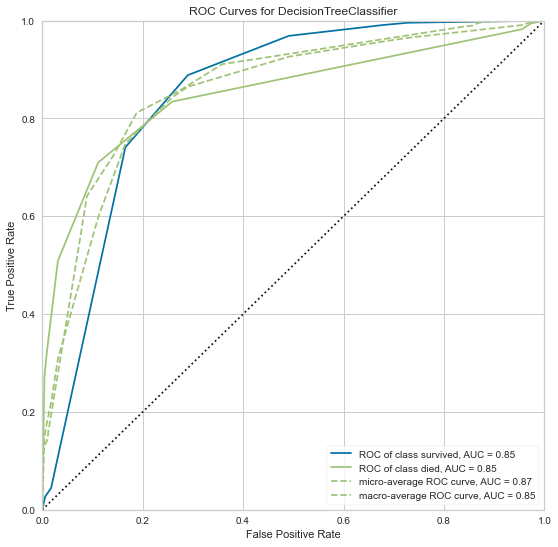

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [52]:
from yellowbrick.classifier import ROCAUC

fig,ax = plt.subplots(figsize = (9,9))
roc_viz = ROCAUC(dt, classes = ['survived', 'died'])
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test,y_test)
roc_viz.poof()

## Precision-Recall curve

The ROC curve may be overlay optimistic for __imbalanced classes__. Another option for evaluating classifiers is using a precision-recall curve. Classification is balancing act of finding everything you need (recall) while limiting the junk results (precision). This is typically a trade-off. As recall goes up, precision usually goes down and vice versa. 

In [53]:
from sklearn.metrics import average_precision_score

y_predict = dt.predict(X_test)
average_precision_score(y_test, y_predict)

0.7123171103368321

0.8139990093314511


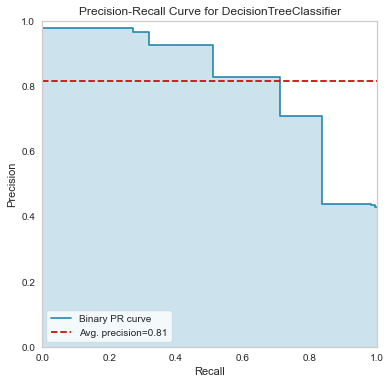

<AxesSubplot:title={'center':'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [54]:
# Here is a Yellowbrick precision-recall curve
from yellowbrick.classifier import PrecisionRecallCurve

fig,ax = plt.subplots(figsize = (6,6))
viz = PrecisionRecallCurve(DecisionTreeClassifier(max_depth = 3))

viz.fit(X_train, y_train)
print(viz.score(X_test, y_test))
viz.poof()

## Cumulative Gains Plot

A cumulative gains plot can be used to evaluate a binary classifier. It models the true positive rate (sensitivity) against the support rate (fraction of positive predictions). The intuition behind this plot is to sort all classifications by predicted probability. Ideally, there would be a clean cut that divides positive from negative samples. If the first 10% of the prediction has 30% of the positive samples, you would plot a point from (0,0) to (.1, .3). You continue this process through all of the samples. 


A common use for this is determining customer response. The cumulative gains curve plots the support or predicted positive rate along the x-axis. Our chart labels this as 'Percentage of samples'. It plots the sensitivity or true positive rate along the y-axis. This is labelled as 'Gain' in our plot. 

If you wanted to contact 90% of the customers that would respond (sensitivity), you can trace from .9 on the y-axis to the right until you hit that curve. The x-axis at that point will indicate how many total customers you need to contact (support) to get to 90%. 

In this case we are not contacting customers that would respond to a survey but predicting surivival on the Titanc. If we ordered all passengers on the Titanic according to our model by how would have 90% of the survivors. If you have an associated cost per contact and revenue per response, you can calculate what the best number is. 

In general, a model that is to the left and above another model is a better model. The best models are lines that go up to the top (if 10% of the samples are positives, it would hit (.1,.1) and then directly to the right. If the plot is below the baseline, we would do better to randomly assign labels that use our model. 

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

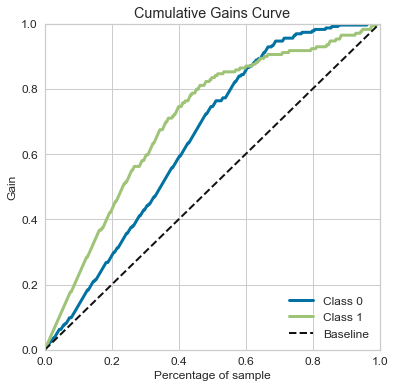

In [57]:
from scikitplot.metrics import plot_cumulative_gain

fig, ax = plt.subplots(figsize = (6,6))
y_probas = dt.predict_proba(X_test)
plot_cumulative_gain(y_test, y_probas, ax = ax)

## Lift Curve

A lift curve is another way of looking at the information in a cumulative gains plot. The _lift_ is how much better we are doing than the baseline model. In our plot below, we can see that if wew sorted our Titanic passengers by the survival probability and took the first 20% of them, our lift would be about 2.2 times (the gain divided by sample percent) better than randomly choosing survivors.

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

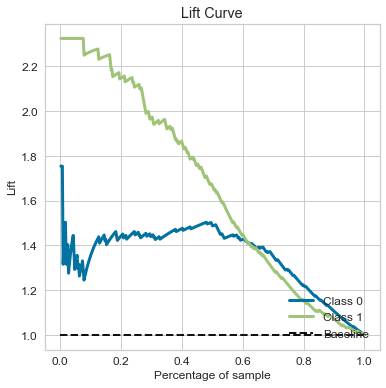

In [59]:
from scikitplot.metrics import plot_lift_curve


fig, ax = plt.subplots(figsize = (6,6))
y_probas = dt.predict_proba(X_test)
plot_lift_curve(y_test, y_probas, ax = ax)

## Class Balance

Yellowbrick has a simple bar plot to view the class sizes. When the relative class sizes are different, accuracy is not a good evaluation metric. When splitting up the data into training and test sets, use _stratified sampling_ so the sets keep a relative proportion of the classes. 

The `test_train_split` function does this when you set the `stratify` parameter to the labels

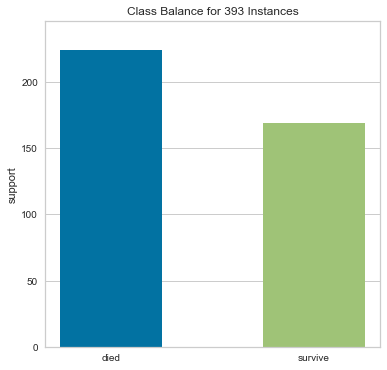

<AxesSubplot:title={'center':'Class Balance for 393 Instances'}, ylabel='support'>

In [62]:
from yellowbrick.classifier import ClassBalance 

fig,ax = plt.subplots(figsize = (6,6))
cb_viz = ClassBalance(labels = ['died', 'survive'])
cb_viz.fit(y_test.survived)
cb_viz.poof()

## Class Prediction Error

The class prediction error plot from Yellowbrick is a bar chart that visualizes a confusion matrix. 

C:\Users\alber\anaconda3\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


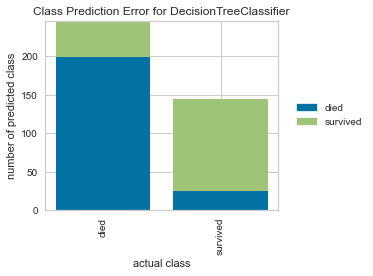

<AxesSubplot:title={'center':'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [64]:
from yellowbrick.classifier import ClassPredictionError

fig,ax = plt.subplots(figsize = (6,4))
cpe_viz = ClassPredictionError(dt, classes = ['died', 'survived'])
cpe_viz.score(X_test, y_test.survived)
cpe_viz.poof()

## Discrimination Threshold

Most binary classifiers that predict probability have _discrimination threshold_ of 50%. If the predicted probability is above 50% the classifier assigns a positive label. 

The plot can be useful to view the trade-off between precision and recall. Assume we are looking for fraud (and considering fraud to be the positive classification). To get high recall (catch all the fraud), we can just classsify everything as fraud. But in a bank situation, this would not be profitable and would require an army of workers. To get high precision (only catch fraud if it is fraud), we could have modeled that only triggers on cases of extreme fraud. But this would miss much of the fraud that might not be as obvious. There is a trade-off here. 

The _queue rate_ is the percent of predictions above the threshold. You can consider this to be the percent of cases to review if you are dealing with fraud. 

If you have the cost for positive, negative, and erroneous calculations, you can determine what threshold you are confortable with. 

The following plot is useful to see what discrimination threshold will maximize the f1 score or adjust precision or recall to an acceptable number when coupled with the queue rate. 

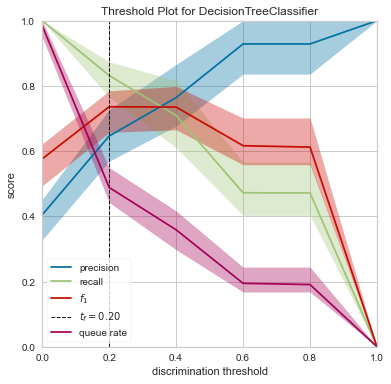

<AxesSubplot:title={'center':'Threshold Plot for DecisionTreeClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [66]:
from yellowbrick.classifier import DiscriminationThreshold

fig, ax = plt.subplots(figsize = (6,6))
dt_viz = DiscriminationThreshold(dt)
dt_viz.fit(X,y.survived)
dt_viz.poof()